In [1]:
import numpy as np
from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library.randomized_benchmarking import RBUtils
import qiskit.circuit.library as circuits

# For simulation
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.test.mock import FakeParis

In [2]:
noise_model = NoiseModel.from_backend(FakeParis(), thermal_relaxation=True, gate_error=True, readout_error=False)
backend = AerSimulator.from_backend(FakeParis(), noise_model=noise_model)

# 1-qubit RB and LRB Experiment

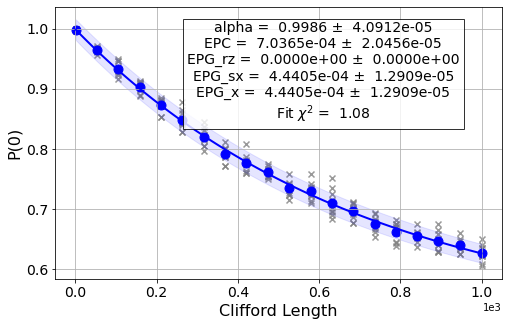

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.49355151 0.99859271 0.50537964] ± [8.55237967e-03 4.09116713e-05 8.59670699e-03]
- χ²: 1.0797147843656842
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9985927062648947 ± 4.0911671323564266e-05
- χ²: 1.0797147843656842
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000703646867552643 ± 2.0455835661782133e-05
- χ²: 1.0797147843656842
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0 ± 0.0
- χ²: 1.0797147843656842
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.0004440453719224309 ± 1.2908917204467778e-05
- χ²: 1.0797147843656842
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.0004440453719224309 ± 1.2908917204467778e-05
- χ²: 1.0797147843656842
- device_components: ['Q0']
- verified: False


In [3]:
lengths = np.linspace(1, 1000, 20, dtype=int)
num_samples = 10
seed = None
qubits = [0]

rb1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = rb1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

display(expdata1.figure(0))
for result in results1:
    print(result)